In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from breakthrough import *
from tqdm import tqdm

Version:  0.2.35


In [3]:
from nn import NumpyNetTable

Version  1.0.6
nn 0 0 2


In [4]:
def all_possible_moves():
    all_moves=[]
    for start in range(9):
        for end in range(9):
            move=[start,end]
            all_moves.append(move)
            
    return all_moves

def state_to_X(state):  
    import numpy as np
    N2=len(state)
    arr=np.zeros((1,N2))  # number of samples, size
    for i in range(N2):
        if state[i]==0:
            arr[0,i]=0
        elif state[i]==1:
            arr[0,i]=1
        elif state[i]==2:
            arr[0,i]=-1
                     
    return arr

In [5]:
print(all_possible_moves())

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8]]


In [6]:
state=initial_state()
initial_X=state_to_X(state)
all_moves=all_possible_moves()

print(state)
print(initial_X)

 v  v  v 
 .  .  . 
 ^  ^  ^ 

[[-1. -1. -1.  0.  0.  0.  1.  1.  1.]]


In [7]:
Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                })

In [8]:
Q.output(state)

[array([0.41986572, 0.58696492, 0.66837124, 0.49257394, 0.29440857]),
 array([-0.16430655, -0.63252637, -0.59104087,  0.17381606, -0.40590161,
        -0.00149276,  0.5017437 ,  0.2824806 , -0.20180983, -0.29612639,
        -0.11898948,  0.15256044, -0.35825319,  0.73680183, -0.32810702,
        -0.01646231, -0.17610486,  0.42138866, -0.14548459,  0.05878362,
         0.17854281, -0.0397141 ,  0.74338026, -0.23053706, -0.00512161,
         0.42067294, -0.41487856,  0.50193527,  0.12590926, -0.56205114,
         0.40454305, -0.4999789 ,  0.37135302,  0.04582591, -0.77020318,
         0.71536764,  0.16917349, -0.55506164, -0.54056981, -0.09960199,
         0.39407138,  0.37206139, -0.1231364 , -0.1863345 ,  0.16841521,
        -0.00308719,  0.04741536,  0.4314324 , -0.2374478 ,  0.27207712,
         0.6843663 ,  0.43299189, -0.20264091,  0.12469142,  0.40018155,
        -0.01675017,  0.20943808, -0.44610134,  0.83798838, -0.10164665,
         0.24001719,  0.28007763, -0.33645891, -0.5863

In [11]:
Q[state]

{(0, 0): -0.1643065507005902,
 (0, 1): -0.6325263740742729,
 (0, 2): -0.5910408730770274,
 (0, 3): 0.1738160557156056,
 (0, 4): -0.405901611593633,
 (0, 5): -0.0014927628733813353,
 (0, 6): 0.5017436979157464,
 (0, 7): 0.28248060027550537,
 (0, 8): -0.20180983165593835,
 (1, 0): -0.29612638528001545,
 (1, 1): -0.11898947518466063,
 (1, 2): 0.1525604360786238,
 (1, 3): -0.3582531895426317,
 (1, 4): 0.7368018327678055,
 (1, 5): -0.3281070243610909,
 (1, 6): -0.01646230536397402,
 (1, 7): -0.1761048622420344,
 (1, 8): 0.4213886558292662,
 (2, 0): -0.14548458600299796,
 (2, 1): 0.058783623883819386,
 (2, 2): 0.1785428081697256,
 (2, 3): -0.03971410364997565,
 (2, 4): 0.7433802611211967,
 (2, 5): -0.2305370619175666,
 (2, 6): -0.005121608445161401,
 (2, 7): 0.42067293610946677,
 (2, 8): -0.41487855528562173,
 (3, 0): 0.5019352687581545,
 (3, 1): 0.1259092606422977,
 (3, 2): -0.5620511398122079,
 (3, 3): 0.40454305230560933,
 (3, 4): -0.4999789011741335,
 (3, 5): 0.37135302447090585,
 (3, 6)

In [13]:
target=[]
actual_moves=valid_moves(state,1)
for i,move in enumerate(all_moves):
    if move in actual_moves:  # keep the old values for valid moves
        target.append(1)
    else:
        target.append(-1)  # lose with illegal move

In [23]:
print(str(target).replace(" 1,","    +1,   "))

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,    +1,    -1, -1, -1, -1, -1, -1, -1, -1, -1,    +1,    -1, -1, -1, -1, -1, -1, -1, -1, -1,    +1,    -1, -1, -1]


In [24]:
np.array(target)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1])

In [25]:
Q[state]=target

In [26]:
Q[state]

{(0, 0): -0.1665158046824299,
 (0, 1): -0.630820049088227,
 (0, 2): -0.5896207688140241,
 (0, 3): 0.1703640458400222,
 (0, 4): -0.4051364012100454,
 (0, 5): -0.004611331369839413,
 (0, 6): 0.498302558223138,
 (0, 7): 0.27905253205765934,
 (0, 8): -0.20314803560670003,
 (1, 0): -0.29725180083243824,
 (1, 1): -0.12133675297433939,
 (1, 2): 0.14926471978575964,
 (1, 3): -0.35801178200977885,
 (1, 4): 0.734046986211278,
 (1, 5): -0.32801565844160346,
 (1, 6): -0.01828311817529124,
 (1, 7): -0.17737580584910909,
 (1, 8): 0.4175156633113665,
 (2, 0): -0.1474841665430453,
 (2, 1): 0.05605839267708497,
 (2, 2): 0.17526326122648653,
 (2, 3): -0.04258561297249023,
 (2, 4): 0.7408709278695342,
 (2, 5): -0.23140050903036372,
 (2, 6): -0.008124088397695838,
 (2, 7): 0.41732931673054996,
 (2, 8): -0.4145863625388464,
 (3, 0): 0.4980386572988196,
 (3, 1): 0.12286432988447529,
 (3, 2): -0.5610354152168423,
 (3, 3): 0.40117621870274994,
 (3, 4): -0.49882249780490867,
 (3, 5): 0.36798559971003536,
 (3, 

In [27]:
def QNN_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    
    new_state=state
    new_actual_moves=valid_moves(new_state,player)
    new_action_values=Q[new_state]
    new_values=[new_action_values[move] for move in new_actual_moves] 
    
    if random.random()<epsilon:  # random move
        action=random_choice(new_actual_moves)
    else:
        action=top_choice(new_actual_moves,weights=new_values)
            
            
#         # Ask the model for the Q values of the old state (inference)
#         old_state_Q_values = self.get_Q(old_state)

#         # Ask the model for the Q values of the new state (inference)
#         new_state_Q_values = self.get_Q(new_state)

#         # Real Q value for the action we took. This is what we will train towards.
#         old_state_Q_values[action] = reward + self.discount * np.amax(new_state_Q_values)
        
    if alpha==0:  # no learning
        return action

    if not last_action is None:  # anything but the first move
        r=0.0  # no reward middle of game
        possible_moves=Q.all_moves
        
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r + gamma*max(new_values))  # max of actually available values
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target
        
    return action

def QNN_post(status,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if alpha==0.0:  # no update if not learning
        return
    
    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    elif status=='stalemate':
        r=0.5
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        possible_moves=Q.all_moves
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r)  # just the reward
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target


In [28]:
Q1_agent=Agent(QNN_move)
Q1_agent.post=QNN_post

Q1_agent.alpha=0.03  # learning rate
Q1_agent.gamma=0.9  # memory
Q1_agent.epsilon=0.1  # chance of making a random move

Q1_agent.original_alpha=Q1_agent.alpha

Q2_agent=Agent(QNN_move)
Q2_agent.post=QNN_post

Q2_agent.alpha=0.03  # learning rate
Q2_agent.gamma=0.9  # memory
Q2_agent.epsilon=0.1  # chance of making a random move

Q2_agent.original_alpha=Q2_agent.alpha


### set the Q tables for the agents

In [29]:
state=initial_state()
initial_X=state_to_X(state)
all_moves=all_possible_moves()

print(state)
print(initial_X)

Q1_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

Q2_agent.Q=NumpyNetTable(state_to_X,all_possible_moves(),
                {
                    'input':initial_X.shape[1],               # number of inputs
                    'hidden':[(5,'logistic'),],
                    'output':(len(all_moves),'tanh'),  # number of moves
                    'cost':'mse',
                },
                        verbose=False)

# initialize things
Q1_agent.Q[state]=[0]*len(all_possible_moves())
Q2_agent.Q[state]=[0]*len(all_possible_moves())


 v  v  v 
 .  .  . 
 ^  ^  ^ 

[[-1. -1. -1.  0.  0.  0.  1.  1.  1.]]


In [30]:


W=[]
L=[]
T=[]

n=[]
games_per_epoch=100
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=0.1
    Q1_agent.alpha=0.03
    Q2_agent.epsilon=0.1
    Q2_agent.alpha=0.03
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(random_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [03:00<00:00,  1.81s/it]


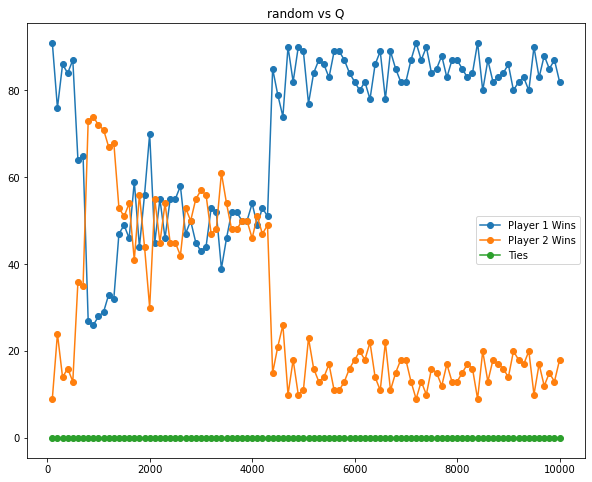

In [31]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs Q')
legend()